# 엑소데이터

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 사이트 연결, 헤더 사용 : 제가 참고 링크 드리겠슴다...이거 사용자 마다 아마 바꿔야 될것 같아요, 
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}
html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm=80220847', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
song_id=[]
song_title=[]

# song id 찾기
for a in soup.find_all("tr",attrs= {"class" : "list"}):
    id=a.get('songid')
    song_id.append(id)
print(song_id)
    
# 곡제목(song title) 찾기
for a2 in soup.find_all("a",attrs= {"class" : "title ellipsis"}):
    ti=a2.get('title')
    song_title.append(ti)
    # 태그가<a>에 class도 같은게 있어서 그런지 none이 자꾸 들어가서 삭제해줬어요
    song_title = list (filter ( None , song_title))
print(song_title)

# song id와 곡제목으로 사전 만들기 (1~30위)
EXO_1 = dict(zip(song_id, song_title))
EXO_1

['82145527', '89655988', '90128240', '82145523', '82145524', '88468830', '88350489', '81992735', '84215866', '81922644', '83647188', '85584767', '85584768', '87625527', '86818658', '86350817', '87295602', '81922655', '83215662', '85622746', '87295601', '86818656', '86535281', '82145526', '87414751', '85622732', '81992738', '81922639', '86818657', '81922654']
['첫 눈', 'Obsession', 'Confession', '12월의 기적 (Miracles in December)', 'Christmas Day', 'Love Shot', 'Tempo', '으르렁 (Growl)', 'LOVE ME RIGHT', "나비소녀 (Don't Go)", 'CALL ME BABY', '불공평해 (Unfair)', 'Sing For You', 'Universe', 'What I Want For Christmas', 'Monster', 'Ko Ko Bop', '피터팬 (Peter Pan)', "December, 2014 (The Winter's Tale)", '발자국 (On the snow)', '전야 (前夜) (The Eve)', 'For Life', 'Lotto', 'My turn to cry', 'Power', 'Girl x Friend', 'Lucky', "Baby, Don't Cry (인어의 눈물)", 'Falling For You', '3.6.5']


{'82145527': '첫 눈',
 '89655988': 'Obsession',
 '90128240': 'Confession',
 '82145523': '12월의 기적 (Miracles in December)',
 '82145524': 'Christmas Day',
 '88468830': 'Love Shot',
 '88350489': 'Tempo',
 '81992735': '으르렁 (Growl)',
 '84215866': 'LOVE ME RIGHT',
 '81922644': "나비소녀 (Don't Go)",
 '83647188': 'CALL ME BABY',
 '85584767': '불공평해 (Unfair)',
 '85584768': 'Sing For You',
 '87625527': 'Universe',
 '86818658': 'What I Want For Christmas',
 '86350817': 'Monster',
 '87295602': 'Ko Ko Bop',
 '81922655': '피터팬 (Peter Pan)',
 '83215662': "December, 2014 (The Winter's Tale)",
 '85622746': '발자국 (On the snow)',
 '87295601': '전야 (前夜) (The Eve)',
 '86818656': 'For Life',
 '86535281': 'Lotto',
 '82145526': 'My turn to cry',
 '87414751': 'Power',
 '85622732': 'Girl x Friend',
 '81992738': 'Lucky',
 '81922639': "Baby, Don't Cry (인어의 눈물)",
 '86818657': 'Falling For You',
 '81922654': '3.6.5'}

In [2]:
import re

# 곡제목, 가사를 담을빈 리스트 만들기
song_title=[]
song_lyrics=[]

# 문장부호선언
pun = [',', '.', '?', '!', ':', ';', '(',')','’',r"'"]

# 불용어 텍스트 파일 불러오기
stopword_list=[]
with open('k_stopword.txt', 'r', encoding='utf-8') as file:
    stopword_list = file.readlines()
# print(stopword_list)

# 데이터셋을 만들기 위해 for문으로. 각 song_id를 가져옴
for i in song_id:
    # 사이트 연결, 헤더 사용 : 제가 링크 드리겠슴다...이거 사용자 마다 아마 바꿔야 될것 같아요, 
    headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}
    html = requests.get('https://www.genie.co.kr/detail/songInfo?xgnm='+i, headers=headers).text
    soup2 = BeautifulSoup(html, 'html.parser')
    
# 곡제목(song title) 찾기
    title=soup2.find('h2', class_='name').text
    
    # 제목 앞뒤 공백제거
    title=title.strip()
    song_title.append(title)
    lyrics=soup2.find("pre",id="pLyrics").find('p').text
    
    # 가사 앞뒤...사이사이 공백제거, splitlines은 문자열 내 개행문자 빼고 리스트로 돌려줌 -> 다시 조인
    lyrics=lyrics.splitlines()
    lyrics="".join( lyrics)
    
    # 가사에 있는 문장부호 제거
    lyrics = re.sub('|'.join(map(re.escape, pun)), '', lyrics)
    song_lyrics.append(lyrics)
    
    # 가사에 있는 불용어 제거
    song_lyrics2 = []
    for token in song_lyrics: 
        if token not in stopword_list: 
            song_lyrics2.append(token)

# 곡제목과 가사로 사전 만들기 (Train용 : 1~30위)
EXO_2 = dict(zip(song_title, song_lyrics2))
EXO_2

{'첫 눈': '첫눈 오는 이런 오후에너에게 전화를걸 수만 있다면 기쁠텐데벌써 일년이 지났는데난 아직 미련 가득해서＂쓸쓸해＂ 어느새 혼잣말시계를 되돌려1년 전으로 갈 수 있다면마음을 되돌려지금 우린 달라졌을까yeah 바보 같은 소리지그래도 만약너를 만나면 눈물 차 올라 바보 같은 난 아무 말 못해말해줘 메리 메리 크리스마스안녕 잘 지내는거지눈이 내리면 멍든 가슴이 모두 하얗게 다 덮여지게 될까미안해 잘해주지 못해 후회만 가득 가득 했던그 크리스마스불빛 가득한 거리거리혼자 걸었어다들 행복해 보여너는 언제나 공기처럼있어줄 거란 착각에 멍청히 보내 내가 너무 미안해     너무 흔한 얘기지나고 나면 너무 소중해항상 지나치지왜 그때는 모르는 걸까지금은 다를 거야 말해주고파너를 만나면 눈물 차 올라 바보 같은 난 아무 말 못해말해줘 메리 메리 크리스마스안녕 잘 지내는거지눈이 내리면 멍든 가슴이 모두 하얗게 다 덮여지게 될까눈물인지 눈 때문인지점점 너 멀리 멀리 보이던그 크리스마스정말 신기한 일이야 너의 생각만으로 눈물 차 흐르니말야Tears are fallingfalling falling다시 너에게로 가고 싶어 무슨 일이든 할 수 있어지금까지 삶이모두 사라진다 해도 Girl너를 만나면 눈물 차 올라 바보 같은 난 아무 말 못해말해줘 메리 메리 크리스마스안녕 잘 지내는거지Baby girl ooh- yeah-눈이 내리면 멍든 가슴이 모두 하얗게 다 덮여지게 될까미안해 잘해주지 못해후회만 가득 가득 했던너를 만나면 눈물 차 올라눈물 차 올라  아무 말 못해아무 말 못하는 나 인걸말해줘 메리 메리 크리스마스잘 지내는거지눈이 내리면 멍든 가슴이모두 하얗게 다 덮여지게 될까눈물인지 눈 때문인지점점 너 멀리 멀리 보이던 그 크리스마스',
 'Obsession': '제발 이제 그만밤이 눈을 멀게 끔 하니넌 또 몰래 숨어들었지잠든 귓가 쓱 핥다 쳐다보다할퀴곤 웃어대끝도 없이 속삭이는 목소리Oh youre the bad dream kill나를 홀려 자꾸 불러너 있는 곳 그래 네게 오라고

In [3]:
#곡번호와 타이틀 데이터 프레임 만들기 (Train용 1~10위)
EXO_df_1 = pd.DataFrame(list(EXO_1.items()), columns=['곡 번호', '곡 제목'])
EXO_df_1

,곡 번호,곡 제목
0,82145527,첫 눈
1,89655988,Obsession
2,90128240,Confession
3,82145523,12월의 기적 (Miracles in December)
4,82145524,Christmas Day
5,88468830,Love Shot
6,88350489,Tempo
7,81992735,으르렁 (Growl)
8,84215866,LOVE ME RIGHT
9,81922644,나비소녀 (Don't Go)


In [4]:
#곡제목과 가사 데이터 프레임 만들기 (All)
EXO_df_2 = pd.DataFrame(list(EXO_2.items()),columns=['곡 제목', '가사'])
EXO_df_2

,곡 제목,가사
0,첫 눈,첫눈 오는 이런 오후에너에게 전화를걸 수만 있다면 기쁠텐데벌써 일년이 지났는데난 아...
1,Obsession,제발 이제 그만밤이 눈을 멀게 끔 하니넌 또 몰래 숨어들었지잠든 귓가 쓱 핥다 쳐다...
2,Confession,Yo I Just wanna know youTime for confessionTim...
3,12월의 기적 (Miracles in December),보이지 않는 널 찾으려고 애쓰다 들리지 않는 널 들으려 애쓰다 보이지 않던 게 보이...
4,Christmas Day,설렘에 부풀어 눈을 뜨는 아침선물의 리본끈을 풀어보는 느낌너를 알아가는 날이면 날마...
5,Love Shot,차갑도록 서롤 겨눈 채날이 선 듯 그 목소리엔숨막히는 것만 가득해Oh oh oh o...
6,Tempo,I cant believe기다렸던 이런 느낌나만 듣고 싶은 그녀는 나의 멜로디하루 ...
7,으르렁 (Growl),yo okay 나 혹시 몰라 경고하는데 지금 위험해자꾸 나를 자극하지마 나도 날 몰...
8,LOVE ME RIGHT,Oh Yeah CmonTake your time왠지 두근대는 밤이야Na Na Na ...
9,나비소녀 (Don't Go),조그만 날갯짓널 향한 이끌림 나에게 따라오라손짓한 것 같아서애절한 눈빛과무언의 이야...


In [5]:
#곡 제목을 기준삼아 데이터 프레임 사전 조인
EXO_final = pd.merge(EXO_df_1, EXO_df_2, on='곡 제목')
EXO_final

,곡 번호,곡 제목,가사
0,82145527,첫 눈,첫눈 오는 이런 오후에너에게 전화를걸 수만 있다면 기쁠텐데벌써 일년이 지났는데난 아...
1,89655988,Obsession,제발 이제 그만밤이 눈을 멀게 끔 하니넌 또 몰래 숨어들었지잠든 귓가 쓱 핥다 쳐다...
2,90128240,Confession,Yo I Just wanna know youTime for confessionTim...
3,82145523,12월의 기적 (Miracles in December),보이지 않는 널 찾으려고 애쓰다 들리지 않는 널 들으려 애쓰다 보이지 않던 게 보이...
4,82145524,Christmas Day,설렘에 부풀어 눈을 뜨는 아침선물의 리본끈을 풀어보는 느낌너를 알아가는 날이면 날마...
5,88468830,Love Shot,차갑도록 서롤 겨눈 채날이 선 듯 그 목소리엔숨막히는 것만 가득해Oh oh oh o...
6,88350489,Tempo,I cant believe기다렸던 이런 느낌나만 듣고 싶은 그녀는 나의 멜로디하루 ...
7,81992735,으르렁 (Growl),yo okay 나 혹시 몰라 경고하는데 지금 위험해자꾸 나를 자극하지마 나도 날 몰...
8,84215866,LOVE ME RIGHT,Oh Yeah CmonTake your time왠지 두근대는 밤이야Na Na Na ...
9,81922644,나비소녀 (Don't Go),조그만 날갯짓널 향한 이끌림 나에게 따라오라손짓한 것 같아서애절한 눈빛과무언의 이야...


In [6]:
# 앨범 형태별 수->뭔가 시각화 하기 좋을 것 같아서 추가 합니다

# 사이트 연결, 헤더 사용 : 제가 참고 링크 드리겠슴다...이거 사용자 마다 아마 바꿔야 될것 같아요, 
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}
html = requests.get('https://www.genie.co.kr/detail/artistAlbum?xxnm=80220847', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
EXO_album_num=[]
    
# 곡 형태별 수 찾기
for num in soup.find_all("em"):
    EXO_album_num.append(int(num.text))
# 숫자가 0인 값 빼기
EXO_album_num=list(filter((0).__ne__, EXO_album_num))
    
# 순서대로 전체앨범, 정규앨범, 싱글/EP, 기타앨범, 참여앨범
print(EXO_album_num)

#EXO_album_num = [EXO_album_num]

EXO_album_df = pd.DataFrame(EXO_album_num, columns=['엑소'],index=['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'])
EXO_album_df

#곡번호와 가사 데이터 프레임 만들기
#EXO_album = {"앨범 종류" : ['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'],  "각 앨범 수" : album_num,}
#print(EXO_album)
#EXO_album_df = pd.DataFrame(EXO_album, columns=['앨범 종류', '각 앨범 수'])
#EXO_album_df

[54, 12, 10, 5, 27]


,엑소
전체앨범,54
정규앨범,12
싱글/EP,10
기타앨범,5
참여앨범,27


## 트와이스 데이터

In [7]:
# 사이트 연결, 헤더 사용 : 제가 참고 링크 드리겠슴다...이거 사용자 마다 아마 바꿔야 될것 같아요, 
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}
html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm=80463902', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
song_id=[]
song_title=[]

# song id 찾기
for a in soup.find_all("tr",attrs= {"class" : "list"}):
    id=a.get('songid')
    song_id.append(id)
print(song_id)
    
# 곡제목(song title) 찾기
for a2 in soup.find_all("a",attrs= {"class" : "title ellipsis"}):
    ti=a2.get('title')
    song_title.append(ti)
    # 태그가<a>에 class도 같은게 있어서 그런지 none이 자꾸 들어가서 삭제해줬어요
    song_title = list (filter ( None , song_title))
print(song_title)

# song id와 곡제목으로 사전 만들기
TW_1 = dict(zip(song_id, song_title))
TW_1

['91165220', '90313511', '91710048', '87590605', '88824340', '89378658', '88353506', '88098432', '87590604', '87893782', '86161553', '86962806', '86677293', '87490163', '85260893', '87122182', '91165222', '91165221', '91165223', '88458580', '91165226', '91165225', '91165227', '91165231', '91165224', '91165229', '91165230', '91165232', '91165228', '88353512']
["I CAN'T STOP ME", 'MORE & MORE', 'CRY FOR ME', 'Merry & Happy', 'FANCY', 'Feel Special', 'YES or YES', 'Dance The Night Away', 'Heart Shaker', 'What is Love?', 'CHEER UP', 'KNOCK KNOCK', 'TT', 'LIKEY', 'OOH-AHH하게', 'SIGNAL', 'UP NO MORE', 'HELL IN HEAVEN', 'DO WHAT WE LIKE', '올해 제일 잘한 일', 'QUEEN', 'BELIEVER', 'GO HARD', 'SAY SOMETHING', 'BRING IT BACK', 'HANDLE IT', 'DEPEND ON YOU', 'BEHIND THE MASK', 'SHOT CLOCK', 'BDZ (Korean Ver.)']


{'91165220': "I CAN'T STOP ME",
 '90313511': 'MORE & MORE',
 '91710048': 'CRY FOR ME',
 '87590605': 'Merry & Happy',
 '88824340': 'FANCY',
 '89378658': 'Feel Special',
 '88353506': 'YES or YES',
 '88098432': 'Dance The Night Away',
 '87590604': 'Heart Shaker',
 '87893782': 'What is Love?',
 '86161553': 'CHEER UP',
 '86962806': 'KNOCK KNOCK',
 '86677293': 'TT',
 '87490163': 'LIKEY',
 '85260893': 'OOH-AHH하게',
 '87122182': 'SIGNAL',
 '91165222': 'UP NO MORE',
 '91165221': 'HELL IN HEAVEN',
 '91165223': 'DO WHAT WE LIKE',
 '88458580': '올해 제일 잘한 일',
 '91165226': 'QUEEN',
 '91165225': 'BELIEVER',
 '91165227': 'GO HARD',
 '91165231': 'SAY SOMETHING',
 '91165224': 'BRING IT BACK',
 '91165229': 'HANDLE IT',
 '91165230': 'DEPEND ON YOU',
 '91165232': 'BEHIND THE MASK',
 '91165228': 'SHOT CLOCK',
 '88353512': 'BDZ (Korean Ver.)'}

In [8]:
# 곡제목, 가사를 담을빈 리스트 만들기
song_title=[]
song_lyrics=[]

# 데이터셋을 만들기 위해 for문으로. 각 song_id를 가져옴
for i in song_id:
    # 사이트 연결, 헤더 사용 : 제가 링크 드리겠슴다...이거 사용자 마다 아마 바꿔야 될것 같아요, 
    headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}
    html = requests.get('https://www.genie.co.kr/detail/songInfo?xgnm='+i, headers=headers).text
    soup2 = BeautifulSoup(html, 'html.parser')
    
# 곡제목(song title) 찾기
    title=soup2.find('h2', class_='name').text
    
    # 제목 앞뒤 공백제거
    title=title.strip()
    song_title.append(title)
    lyrics=soup2.find("pre",id="pLyrics").find('p').text
    
    # 가사 앞뒤...사이사이 공백제거, splitlines은 문자열 내 개행문자 빼고 리스트로 돌려줌 -> 다시 조인
    lyrics=lyrics.splitlines()
    lyrics="".join( lyrics)
    
    # 가사에 있는 문장부호 제거
    lyrics = re.sub('|'.join(map(re.escape, pun)), '', lyrics)
    song_lyrics.append(lyrics)
    
    # 가사에 있는 불용어 제거
    song_lyrics2 = []
    for token in song_lyrics: 
        if token not in stopword_list: 
            song_lyrics2.append(token)

# 곡제목과 가사로 사전 만들기 (All)
TW_2 = dict(zip(song_title, song_lyrics2))
TW_2

{"I CAN'T STOP ME": '알람이 울려대 Ring ring a ling서로의 눈길이 닿을 때마다알면서 빙빙 도는데 점점 다가가잖아 I know its too late마음속으로는 다 알고 있잖아결국에는 선을 넘게 될 거라는 걸   Im warning myself너 그러면 안 돼매분 매초 내 맘이 내 맘을 추월해 Out of control  나를 감시하는 저 Spot spot spotlight비출수록 어둠 속으로 빨려 들어 끝이 보이는데 I know its not rightI cant stop me cant stop me내 앞에 놓여진 이 Red red red line건너편의 너와 난 이미 눈을 맞춰 느끼고 싶어 짜릿한 HighlightI cant stop me cant stop meI cant stop me cant stop me눈감아 달라구 Ya ya딱 한 번만 No rules ah ah모른 척해 줘 Lights off tonight나 참을 수 없을 거 같아 Losing myself이제는 Turning back불가능해 난 점점 더 깊은 어둠에너무나 짜릿해 나 눈을 감을래다시는 돌아갈 수 없을 것만 같애  Out of control나를 감시하는 저 Spot spot spotlight비출수록 어둠 속으로 빨려 들어 끝이 보이는데 I know its not rightI cant stop me cant stop me내 앞에 놓여진 이 Red red red line건너편의 너와 난 이미 눈을 맞춰 느끼고 싶어 짜릿한 HighlightI cant stop me cant stop meRisky risky wiggy 위기This is an emergencyHelp me help me somebody stop meCuz I know I cant stop me 답은 알고 있잖아 근데 가고 있잖아이러고 싶지 않아  내 안에 내가 또 있나 봐 나는 원하는데원하는 게 안돼Guilty 난 싫은데I cant stop me cant stop me cant stop me나를 감시

In [9]:
#곡번호와 타이틀 데이터 프레임 만들기
TW_df_1 = pd.DataFrame(list(TW_1.items()), columns=['곡 번호', '곡 제목'])
TW_df_1

,곡 번호,곡 제목
0,91165220,I CAN'T STOP ME
1,90313511,MORE & MORE
2,91710048,CRY FOR ME
3,87590605,Merry & Happy
4,88824340,FANCY
5,89378658,Feel Special
6,88353506,YES or YES
7,88098432,Dance The Night Away
8,87590604,Heart Shaker
9,87893782,What is Love?


In [10]:
#곡제목과 가사 데이터 프레임 만들기
TW_df_2 = pd.DataFrame(list(TW_2.items()),columns=['곡 제목', '가사'])
TW_df_2

,곡 제목,가사
0,I CAN'T STOP ME,알람이 울려대 Ring ring a ling서로의 눈길이 닿을 때마다알면서 빙빙 도...
1,MORE & MORE,I know I want it입에 바른 소린 이제 그만할게Cause I deserv...
2,CRY FOR ME,I know 고쳐 쓸 가치도 없단 걸하지만 그녀와 달리 난 널쉽게 놔줄 맘이 없거든...
3,Merry & Happy,매년 12월 달력을 넘길 때마다시작되는 그 알 수 없는 허전함은모른 척을 해봐도 밀...
4,FANCY,지금 하늘 구름 색은 Tropical yeah저 태양 빨간빛 네 두 볼 같아Oh t...
5,Feel Special,그런 날이 있어갑자기 혼자인 것만 같은 날어딜 가도 내 자리가 아닌 것만 같고고갠 ...
6,YES or YES,Hey boyLook Im gonna make thissimple for you y...
7,Dance The Night Away,나나나나나나나 나나나나나나나You and me in the moonlight 별 꽃...
8,Heart Shaker,Yeah Yeah Yeah YeahCome and be my love Come an...
9,What is Love?,매일같이 영화 속에서나책 속에서나 드라마 속에서 사랑을 느껴 Um- 사랑을 배워내 ...


In [11]:
#곡 번호를 기준삼아 데이터 프레임 사전 조인
TW_final = pd.merge(TW_df_1, TW_df_2, on='곡 제목')
TW_final

,곡 번호,곡 제목,가사
0,91165220,I CAN'T STOP ME,알람이 울려대 Ring ring a ling서로의 눈길이 닿을 때마다알면서 빙빙 도...
1,90313511,MORE & MORE,I know I want it입에 바른 소린 이제 그만할게Cause I deserv...
2,91710048,CRY FOR ME,I know 고쳐 쓸 가치도 없단 걸하지만 그녀와 달리 난 널쉽게 놔줄 맘이 없거든...
3,87590605,Merry & Happy,매년 12월 달력을 넘길 때마다시작되는 그 알 수 없는 허전함은모른 척을 해봐도 밀...
4,88824340,FANCY,지금 하늘 구름 색은 Tropical yeah저 태양 빨간빛 네 두 볼 같아Oh t...
5,89378658,Feel Special,그런 날이 있어갑자기 혼자인 것만 같은 날어딜 가도 내 자리가 아닌 것만 같고고갠 ...
6,88353506,YES or YES,Hey boyLook Im gonna make thissimple for you y...
7,88098432,Dance The Night Away,나나나나나나나 나나나나나나나You and me in the moonlight 별 꽃...
8,87590604,Heart Shaker,Yeah Yeah Yeah YeahCome and be my love Come an...
9,87893782,What is Love?,매일같이 영화 속에서나책 속에서나 드라마 속에서 사랑을 느껴 Um- 사랑을 배워내 ...


In [12]:
# 앨범 형태별 수->뭔가 시각화 하기 좋을 것 같아서 추가 합니다

# 사이트 연결, 헤더 사용 : 제가 참고 링크 드리겠슴다...이거 사용자 마다 아마 바꿔야 될것 같아요, 
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}
html = requests.get('https://www.genie.co.kr/detail/artistAlbum?xxnm=80463902', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
TW_album_num=[]
    
# 곡 형태별 수 찾기
for num in soup.find_all("em"):
    TW_album_num.append(int(num.text))
                        
# 숫자가 0인 값 빼기
TW_album_num=list(filter((0).__ne__, TW_album_num))
    
# 순서대로 전체앨범, 정규앨범, 싱글/EP, 기타앨범, 참여앨범
print(TW_album_num)

#TW_album_num = [TW_album_num]

TW_album_df = pd.DataFrame(TW_album_num, columns=['트와이스'],index=['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'])
TW_album_df

#곡번호와 가사 데이터 프레임 만들기
#TW_album = {"앨범 종류" : ['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'],  "각 앨범 수" : TW_album_num,}
#print(TW_album)
#TW_album_df = pd.DataFrame(TW_album, columns=['앨범 종류', '각 앨범 수'])
#TW_album_df

[35, 7, 24, 2, 2]


,트와이스
전체앨범,35
정규앨범,7
싱글/EP,24
기타앨범,2
참여앨범,2


## 품사태깅(엑소)

In [13]:
#품사 태깅을 위한 konlpy Import, okt는 한국어 분석기
from konlpy.tag import Okt
twi_tagger = Okt()
from konlpy.utils import pprint

ImportError: DLL load failed while importing _jpype: DLL 초기화 루틴을 실행할 수 없습니다.

In [14]:
 # 토큰화를 위한 모듈 호출
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer

# 불용어 제거를 위한 모듈 호출
from nltk.corpus import stopwords


# (돈, Noun) -> "돈/Noun" 형태로 바꿈
def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

In [141]:
# 리뷰 단어 리스트 형태로 만드는 함수
def review_to_wordlist(review):
    try:
        review_text = BeautifulSoup(review.strip()).get_text()
    except AttributeError:
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words

In [142]:
#단어를 품사 단위로 
words=[]
for review in EXO_final["가사"]:
    words += review_to_wordlist(review)

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


In [143]:
#단어 단위로 분해 확인
pprint(words[:10])

['제발/Noun',
 '이제/Noun',
 '그만/Modifier',
 '밤/Noun',
 '이/Josa',
 '눈/Noun',
 '을/Josa',
 '멀다/Adjective',
 '끄다/Verb',
 '하니/Noun']


In [144]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [145]:
#전체 단어 수 세기
len(words_nltk.vocab())

1921

In [146]:
# 결과 저장
EXO_result2 = words_nltk.vocab().most_common(980)
# 데이터 프레임으로 생성
EXO_result2 = pd.DataFrame(EXO_result2);EXO_result2[:20]
# 결과로 가장 많이 나온게 ''<-이거인데 버릴지 말지 고민 Let's이런식으로 쓰여서

,0,1
0,너/Noun,159
1,하다/Verb,150
2,에/Josa,130
3,을/Josa,125
4,이/Josa,118
5,의/Josa,108
6,oh/Alpha,86
7,내/Noun,84
8,나/Noun,77
9,-/Punctuation,73


In [147]:
EXO_result2.columns = ['word', 'counts']
EXO_result2[:10]
#단어와 품사가 합쳐진 것을 나눠줌
EXO_result2['단어'], EXO_result2['품사'] = zip(*EXO_result2.word.map(lambda x: x.split('/')))
EXO_result2 = EXO_result2.drop(['word'], 1)
#보기 좋은 순서로 재배치
EXO_result2 = EXO_result2[['단어', '품사', 'counts']]

In [148]:
#명사만 10위까지 뽑기
Noun = EXO_result2['품사'] == "Noun"
EXO_result2[Noun][:10]

,단어,품사,counts
0,너,Noun,159
7,내,Noun,84
8,나,Noun,77
10,널,Noun,72
16,눈,Noun,54
20,그,Noun,49
22,네,Noun,47
26,날,Noun,42
29,말,Noun,40
33,더,Noun,39


In [23]:
#동사만 10위까지 뽑기
Verb = EXO_result2['품사'] == "Verb"
EXO_result2[Verb][:10]

,단어,품사,counts
1,하다,Verb,150
24,보다,Verb,47
34,않다,Verb,39
36,내다,Verb,37
43,되다,Verb,31
61,들다,Verb,23
69,돼다,Verb,21
75,가다,Verb,19
76,버리다,Verb,19
78,모르다,Verb,19


In [24]:
#형용사만 10위까지
Adjective = EXO_result2['품사'] == "Adjective"
EXO_result2[Adjective][:10]

,단어,품사,counts
18,있다,Adjective,50
21,없다,Adjective,48
31,같다,Adjective,40
91,좋다,Adjective,17
97,그렇다,Adjective,16
109,하얗다,Adjective,15
115,아니다,Adjective,15
211,아름답다,Adjective,9
225,이렇다,Adjective,8
241,영원하다,Adjective,8


In [25]:
## 품사태깅(트와이스)

In [26]:
#단어를 품사 단위로 
words=[]
for review in TW_final["가사"]:
    words += review_to_wordlist(review)

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


In [27]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [28]:
#단어 단위로 분해 확인
pprint(words[:10])

['알람/Noun',
 '이/Josa',
 '울리다/Verb',
 'Ring/Alpha',
 'ring/Alpha',
 'a/Alpha',
 'ling/Alpha',
 '서로/Noun',
 '의/Josa',
 '눈길/Noun']


In [29]:
#전체 단어 수 세기
len(words_nltk.vocab())

1871

In [30]:
# 결과 저장
TW_result2 = words_nltk.vocab().most_common(980)
# 데이터 프레임으로 생성
TW_result2 = pd.DataFrame(TW_result2);TW_result2[:20]
# 결과로 가장 많이 나온게 ''<-이거인데 버릴지 말지 고민 Let's이런식으로 쓰여서

,0,1
0,하다/Verb,167
1,I/Alpha,134
2,이/Josa,115
3,을/Josa,109
4,knock/Alpha,98
5,me/Alpha,97
6,내/Noun,92
7,가/Josa,91
8,you/Alpha,90
9,너/Noun,87


In [31]:
TW_result2.columns = ['word', 'counts']
TW_result2[:10]
#단어와 품사가 합쳐진 것을 나눠줌
TW_result2['단어'], TW_result2['품사'] = zip(*TW_result2.word.map(lambda x: x.split('/')))
TW_result2 = TW_result2.drop(['word'], 1)
#보기 좋은 순서로 재배치
TW_result2 = TW_result2[['단어', '품사', 'counts']]

In [32]:
#명사만 10위까지 뽑기
Noun = TW_result2['품사'] == "Noun"
TW_result2[Noun][:10]

,단어,품사,counts
6,내,Noun,92
9,너,Noun,87
14,더,Noun,67
23,날,Noun,53
24,맘,Noun,50
25,것,Noun,48
31,네,Noun,44
44,나,Noun,34
46,이,Noun,33
49,말,Noun,32


In [33]:
#동사만 10위까지 뽑기
Verb = TW_result2['품사'] == "Verb"
TW_result2[Verb][:10]

,단어,품사,counts
0,하다,Verb,167
18,않다,Verb,60
36,보다,Verb,40
40,모르다,Verb,35
47,가다,Verb,33
52,싶다,Verb,29
55,보내다,Verb,28
64,버리다,Verb,25
68,되다,Verb,24
69,돼다,Verb,24


In [34]:
#형용사만 10위까지
Adjective = TW_result2['품사'] == "Adjective"
TW_result2[Adjective][:10]

,단어,품사,counts
15,있다,Adjective,66
16,없다,Adjective,64
35,같다,Adjective,41
42,어떻다,Adjective,35
63,그렇다,Adjective,25
93,원하다,Adjective,19
104,싫다,Adjective,17
107,아니다,Adjective,17
119,이렇다,Adjective,16
142,좋다,Adjective,13


# 알고리즘 구현

In [15]:
# 엑소 노래별 가사의 단어 종류별 개수 (조사는 무의미하므로 포함 안함)
cnt_Total = []
ratio_Noun = []
ratio_Verb = []
ratio_Adject = []
ratio_Alpha = []
ratio_else = []
titles = []

#단어를 품사 단위로 (각 가사별로 조사할 예정)
for review, title in zip(EXO_final["가사"], EXO_final["곡 제목"]):
    titles.append(title)
    cnt_n = 0
    cnt_v = 0
    cnt_ad = 0
    cnt_al = 0
    cnt_else = 0
    words = []
    #words[] = review_to_wordlist(review)
    words = review_to_wordlist(review)

    #전체 단어 수 세기
    cnt_Total.append(len(words))
    
    #각 단어 수 세기
    for word in words:
        tmp = word.split('/')[1]
        if tmp == "Noun": cnt_n += 1
        elif tmp  == "Verb": cnt_v += 1
        elif tmp  == "Adjective": cnt_ad += 1
        elif tmp  == "Alpha": cnt_al += 1
        else : cnt_else += 1
    ratio_Noun.append(cnt_n/len(words))
    ratio_Verb.append(cnt_v/len(words))
    ratio_Adject.append(cnt_ad/len(words))
    ratio_Alpha.append(cnt_al/len(words))
    ratio_else.append(cnt_else/len(words))
# EXO_words = dict(zip(titles, cnt_Total, ratio_Noun, ratio_Verb, ratio_Adject, ratio_Alpha))

# print(title, "\n", cnt_Total, "\n", ratio_Noun, "\n", ratio_Verb, "\n", ratio_Adject, "\n", ratio_Alpha)
EXO_df_fin = pd.DataFrame({'곡 제목':titles, '총 단어수':cnt_Total, '명사':ratio_Noun, '동사':ratio_Verb, '형용사':ratio_Adject, '영어':ratio_Alpha, '기타':ratio_else})
EXO_df_fin.head()

NameError: name 'review_to_wordlist' is not defined

In [55]:
# 트와이스 노래별 가사의 단어 종류별 개수 (조사는 무의미하므로 포함 안함)
cnt_Total = []
ratio_Noun = []
ratio_Verb = []
ratio_Adject = []
ratio_Alpha = []
ratio_else = []
titles = []

#단어를 품사 단위로 (각 가사별로 조사할 예정)
for review, title in zip(TW_final["가사"], TW_final["곡 제목"]):
    titles.append(title)
    cnt_n = 0
    cnt_v = 0
    cnt_ad = 0
    cnt_al = 0
    cnt_else = 0
    words = []
    #words[] = review_to_wordlist(review)
    words = review_to_wordlist(review)

    #전체 단어 수 세기
    cnt_Total.append(len(words))
    
    #각 단어 수 세기
    for word in words:
        tmp = word.split('/')[1]
        if tmp == "Noun": cnt_n += 1
        elif tmp  == "Verb": cnt_v += 1
        elif tmp  == "Adjective": cnt_ad += 1
        elif tmp  == "Alpha": cnt_al += 1
        else : cnt_else += 1
    ratio_Noun.append(cnt_n/len(words))
    ratio_Verb.append(cnt_v/len(words))
    ratio_Adject.append(cnt_ad/len(words))
    ratio_Alpha.append(cnt_al/len(words))
    ratio_else.append(cnt_else/len(words))
    
TW_df_fin = pd.DataFrame({'곡 제목':titles, '총 단어수':cnt_Total, '명사':ratio_Noun, '동사':ratio_Verb, '형용사':ratio_Adject, '영어':ratio_Alpha, '기타':ratio_else})
TW_df_fin.head()

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


,곡 제목,총 단어수,명사,동사,형용사,영어,기타
0,I CAN'T STOP ME,350,0.231429,0.151429,0.051429,0.420000,0.145714
1,MORE & MORE,324,0.250000,0.169753,0.055556,0.435185,0.089506
2,FANCY,311,0.363344,0.109325,0.096463,0.311897,0.118971
3,Feel Special,285,0.308772,0.105263,0.122807,0.284211,0.178947
4,Merry & Happy,232,0.340517,0.189655,0.129310,0.081897,0.258621


In [56]:
# 구분 추가 (엑소인지 트와이스인지 구별)
for i in range(len(EXO_df_fin)):
    EXO_df_fin['구분'] = 0
for i in range(len(TW_df_fin)):
    TW_df_fin['구분'] = 1
EXO_df_fin.head()

,곡 제목,총 단어수,명사,동사,형용사,영어,기타,구분
0,Obsession,411,0.265207,0.201946,0.043796,0.357664,0.131387,0
1,Confession,265,0.173585,0.086792,0.033962,0.615094,0.090566,0
2,첫 눈,314,0.442675,0.203822,0.085987,0.031847,0.235669,0
3,12월의 기적 (Miracles in December),262,0.435115,0.229008,0.064885,0.003817,0.267176,0
4,Love Shot,263,0.243346,0.117871,0.038023,0.437262,0.163498,0


In [57]:
# 엑소, 트와이스 데이터 합치기
All_df = pd.concat([EXO_df_fin, TW_df_fin])

In [58]:
# 문자열, 무의미한 데이터 총 단어수 삭제
All_df.drop('곡 제목', axis = 1, inplace = True) # 문자열이라 삭제
All_df.drop('총 단어수', axis = 1, inplace = True) # 무의미한 데이터라 삭제
All_df.drop('기타', axis = 1, inplace = True) # 무의미한 데이터라 삭제

In [59]:
All_df

,명사,동사,형용사,영어,구분
0,0.265207,0.201946,0.043796,0.357664,0
1,0.173585,0.086792,0.033962,0.615094,0
2,0.442675,0.203822,0.085987,0.031847,0
3,0.435115,0.229008,0.064885,0.003817,0
4,0.243346,0.117871,0.038023,0.437262,0
5,0.353211,0.151376,0.064220,0.270642,0
6,0.271552,0.157328,0.068966,0.346983,0
7,0.461078,0.269461,0.038922,0.029940,0
8,0.307692,0.076923,0.034483,0.397878,0
9,0.332447,0.122340,0.029255,0.343085,0


In [60]:
# 데이터들 순서 무작위로 섞어주기
import sklearn
All_df_shuffled = sklearn.utils.shuffle(All_df)
# Train - Test 데이터 나누기 (7:3 비율로)

data_cnt = len(All_df_shuffled)

train_cnt = int(data_cnt*0.7) + 1

Train_df_set = All_df_shuffled[:train_cnt]
Test_df_set = All_df_shuffled[train_cnt:]
print("Train data count : ", len(Train_df_set)) # 42
print("Test data count : ", len(Test_df_set))   # 18

Train data count :  43
Test data count :  17


In [61]:
# 데이터 셋 준비
X_Train = Train_df_set.drop("구분", axis=1) # 구분 열 버리고 저장
Y_Train = Train_df_set["구분"] # 구분 열 정보만 저장
X_Test = Test_df_set.drop("구분", axis=1).copy() # 구분 열 버리고 저장

In [62]:
# 기계 학습용 패키지 선언
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
import numpy as np

#from sklearn.neural_network import MLPClassifier
#from sklearn.feature_extraction.text import CountVectorizer

In [63]:
# 1 - Logistic Regression
log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X_Train, Y_Train)

Y_Pred = log_reg.predict(X_Test)
score_log_reg = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_log_reg = round(log_reg.score(X_Train, Y_Train) * 100, 2)
print("Logistic Regression Score : ",score_log_reg)

Logistic Regression Score :  62.79


In [64]:
# 2 - Linear SVC
lin_svc = LinearSVC()
lin_svc.fit(X_Train, Y_Train)

Y_Pred = lin_svc.predict(X_Test)
score_lin_svc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_lin_svc = round(lin_svc.score(X_Train, Y_Train) * 100, 2)
print("Linear SVC Score : ",score_lin_svc)

Linear SVC Score :  69.77


In [65]:
# 3 - Decision Tree
import pydot
from sklearn.tree import export_graphviz
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_Train, Y_Train)

Y_Pred = dec_tree.predict(X_Test)
score_dec_tree = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_dec_tree = round(dec_tree.score(X_Train, Y_Train) * 100, 2)
print("Decision Tree Score : ",score_dec_tree)

Decision Tree Score :  100.0


In [66]:
# 4 - Gaussian Naive Bayes
gaus = GaussianNB()
gaus.fit(X_Train, Y_Train)

Y_Pred = gaus.predict(X_Test)
score_gaus = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_gaus = round(gaus.score(X_Train, Y_Train) * 100, 2)
print("Gaussian Naive Bayes Score : ",score_gaus)

Gaussian Naive Bayes Score :  72.09


In [67]:
# 5 - Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)

Y_Pred = sgd.predict(X_Test)
score_sgd = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_sgd = round(sgd.score(X_Train, Y_Train) * 100, 2)
print("Stochastic Gradient Descent Score : ",score_sgd)

Stochastic Gradient Descent Score :  74.42


In [68]:
# 6 - Support Vector Machines
svc = SVC()
solver = 'liblinear'
svc.fit(X_Train, Y_Train)

Y_Pred = svc.predict(X_Test)
score_svc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_svc = round(svc.score(X_Train, Y_Train) * 100, 2)
print("Support Vector Machines Score : ",score_svc)

Support Vector Machines Score :  72.09


In [69]:
# 7 - KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_Train, Y_Train)

Y_Pred = knn.predict(X_Test)
score_knn = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_knn = round(knn.score(X_Train, Y_Train) * 100, 2)
print("KNN Score : ",score_knn)

KNN Score :  81.4


In [70]:
# 8 - Random Forest
ran_fore = RandomForestClassifier(n_estimators = 100)
ran_fore.fit(X_Train, Y_Train)

Y_Pred = ran_fore.predict(X_Test)
score_ran_fore = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_ran_fore = round(ran_fore.score(X_Train, Y_Train) * 100, 2)
print("Random Forest Score : ",score_ran_fore)

Random Forest Score :  100.0


In [71]:
# 9 - Perceptron
perc = Perceptron()
perc.fit(X_Train, Y_Train)

Y_Pred = perc.predict(X_Test)
score_perc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_perc = round(perc.score(X_Train, Y_Train) * 100, 2)
print("Perceptron Score : ",score_perc)

Perceptron Score :  69.77


In [72]:
# 최종 결과 스코어 확인
model_res = pd.DataFrame({
    'Model name': ['Logistic Regression', 'Linear SVC', 'Decision Tree', 
                   'Gaussian Naive Bayes', 'Stochastic Gradient Descent', 
                   'Support Vector Machines', 'KNN', 'Random Forest', 
                   'Perceptron'],
    'Score': [score_log_reg, score_lin_svc, score_dec_tree, score_gaus, 
             score_sgd, score_svc, score_knn, score_ran_fore, score_perc]})
model_res.sort_values(by = 'Score', ascending = False)

,Model name,Score
2,Decision Tree,100.00
7,Random Forest,100.00
6,KNN,81.40
4,Stochastic Gradient Descent,74.42
3,Gaussian Naive Bayes,72.09
5,Support Vector Machines,72.09
1,Linear SVC,69.77
8,Perceptron,69.77
0,Logistic Regression,62.79


In [73]:
# csv 파일 생성
final_res = pd.DataFrame({
    '명사' : Test_df_set['명사'],
    '동사' : Test_df_set['동사'],
    '형용사' : Test_df_set['형용사'],
    '영어' : Test_df_set['영어'],
    '구분(엑소:0 / 트와이스:1)' : Y_Pred})
final_res.to_csv('Final_Results_TextMining_Assignment.csv', mode = 'w', encoding = 'utf-8-sig', index = False)

In [74]:
final_check = pd.read_csv('Final_Results_TextMining_Assignment.csv')
final_check.describe()

,명사,동사,형용사,영어,구분(엑소:0 / 트와이스:1)
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.292179,0.142178,0.054908,0.349933,0.705882
std,0.081487,0.052406,0.033684,0.174857,0.469668
min,0.173585,0.076923,0.010638,0.029940,0.000000
25%,0.231429,0.107050,0.033962,0.231806,0.000000
50%,0.296296,0.125786,0.048872,0.343085,1.000000
75%,0.332447,0.168712,0.085526,0.468085,1.000000
max,0.461078,0.269461,0.129310,0.615094,1.000000


# 데이터 시각화

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [81]:
#sns.barplot(data=EXO_album_df, x='앨범 종류',y='각 앨범 수')

In [82]:
album_df = EXO_album_df.join(TW_album_df)
album_df

,엑소,트와이스
전체앨범,54,34
정규앨범,12,7
싱글/EP,10,23
기타앨범,5,2
참여앨범,27,2


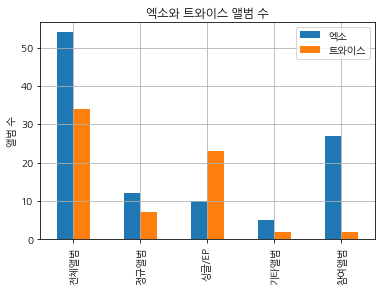

In [83]:
album = album_df.plot(kind='bar',title="엑소와 트와이스 앨범 수", ylabel='앨범 수', grid=True)
plt.show()

In [85]:
EXO_df_fin.head()

,곡 제목,총 단어수,명사,동사,형용사,영어,기타,구분
0,Obsession,411,0.265207,0.201946,0.043796,0.357664,0.131387,0
1,Confession,265,0.173585,0.086792,0.033962,0.615094,0.090566,0
2,첫 눈,314,0.442675,0.203822,0.085987,0.031847,0.235669,0
3,12월의 기적 (Miracles in December),262,0.435115,0.229008,0.064885,0.003817,0.267176,0
4,Love Shot,263,0.243346,0.117871,0.038023,0.437262,0.163498,0


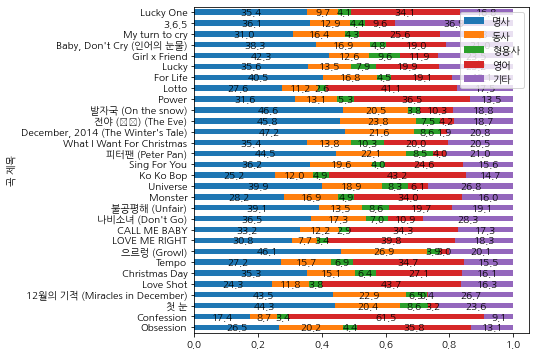

In [95]:
# EXO 노래 가사 품사 단어 비율 시각화
EXO_plt = EXO_df_fin.plot(kind='barh', stacked=True,x='곡 제목', y=['명사', '동사', '형용사', '영어','기타'],figsize=(6,6))
# 수평 막대그래프에 값 표시
for p in EXO_plt.patches:
    left, bottom, width, height = p.get_bbox().bounds
    EXO_plt.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.show()

In [87]:
TW_df_fin.head()

,곡 제목,총 단어수,명사,동사,형용사,영어,기타,구분
0,I CAN'T STOP ME,350,0.231429,0.151429,0.051429,0.420000,0.145714,1
1,MORE & MORE,324,0.250000,0.169753,0.055556,0.435185,0.089506,1
2,FANCY,311,0.363344,0.109325,0.096463,0.311897,0.118971,1
3,Feel Special,285,0.308772,0.105263,0.122807,0.284211,0.178947,1
4,Merry & Happy,232,0.340517,0.189655,0.129310,0.081897,0.258621,1


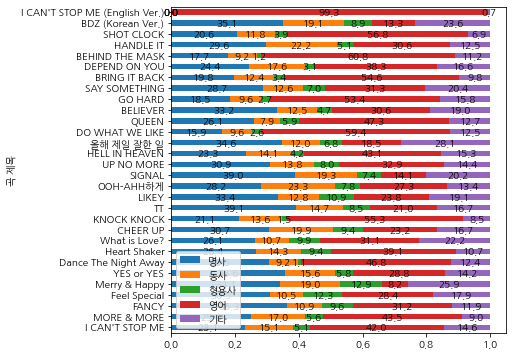

In [96]:
TW_plt = TW_df_fin.plot(kind='barh', stacked=True,x='곡 제목', y=['명사', '동사', '형용사', '영어','기타'], figsize=(6,6))
for p in TW_plt.patches:
    left, bottom, width, height = p.get_bbox().bounds
    TW_plt.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.show()

In [173]:
#워드 클라우드

from wordcloud import WordCloud



wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',
              background_color="white",
              width=1000,
              height=1000,
              max_words=100,
              max_font_size=300)

In [175]:
EXO_Josa = EXO_result2['품사'] == "Josa"
EXO_j = EXO_result2[Josa].index
EXO_word_df = EXO_result2.drop(EXO_j)
EXO_word_df.drop('품사', axis = 1, inplace = True)
EXO_list = EXO_word_df.values.tolist()
EXO_dict = dict(EXO_list)

In [176]:
#EXO_word_df = EXO_result2.drop('품사', axis = 1, inplace = True)
#EXO_list = EXO_result2.values.tolist()
#EXO_list

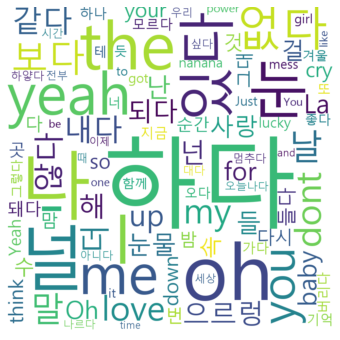

In [180]:
wordcloud_words = wc.generate_from_frequencies(EXO_dict)
array = wc.to_array()

fig = plt.figure(figsize=(6,6))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

In [178]:
TW_Josa = TW_result2['품사'] == "Josa"
TW_j = TW_result2[Josa].index
TW_word_df = TW_result2.drop(TW_j)
TW_word_df.drop('품사', axis = 1, inplace = True)
TW_list = TW_word_df.values.tolist()
TW_dict = dict(TW_list)

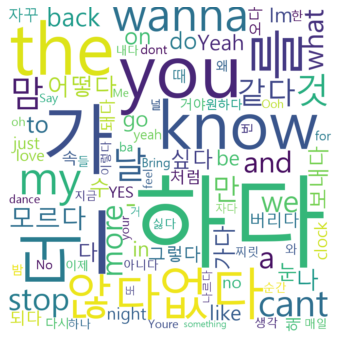

In [181]:
wordcloud_words = wc.generate_from_frequencies(TW_dict)
array = wc.to_array()

fig = plt.figure(figsize=(6,6))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()